# Top2Vec Tutorial

## Working Of Top2Vec:


1.   Generate embedding vectors for documents and words.
2.   Perform dimensionality reduction on the vectors using an algorithm such as UMAP.
3. Cluster the vectors using a clustering algorithm such as HDBSCAN.
4. Assign topics to each cluster.

In [26]:
!pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Libraries

In [27]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec

## Read the Data

In [28]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [29]:
newsgroups.data

["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-per

In [30]:
len(newsgroups.data)

18846

## Training a Top2Vec Model

In [31]:
from top2vec import Top2Vec

model = Top2Vec(newsgroups.data, workers=4, embedding_model='universal-sentence-encoder')

2022-06-11 12:43:33,685 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-11 12:43:43,418 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-11 12:43:47,377 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-11 12:44:20,815 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-11 12:44:42,857 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-11 12:44:45,198 - top2v

## Viewing the Number of Topics

In [32]:
model.get_num_topics()

98

In [33]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [34]:
topic_sizes


array([1666,  714,  657,  651,  622,  589,  560,  507,  496,  422,  413,
        400,  400,  358,  354,  331,  331,  322,  306,  284,  279,  237,
        225,  218,  215,  213,  196,  191,  186,  185,  185,  181,  176,
        167,  165,  164,  155,  149,  145,  145,  140,  128,  126,  125,
        124,  122,  118,  112,  110,  107,  104,  102,  100,  100,   99,
         97,   96,   95,   95,   94,   94,   93,   90,   86,   86,   85,
         84,   83,   79,   79,   79,   78,   78,   75,   75,   75,   73,
         73,   70,   67,   63,   59,   59,   56,   55,   54,   54,   53,
         53,   51,   48,   48,   47,   41,   40,   39,   38,   32])

In [35]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])

## Getting Keywords for Each Topic

In [36]:
model.topic_words

array([['recchi', 'potvin', 'nyr', ..., 'pittsburgh', 'binghamton',
        'pitt'],
       ['diagnosed', 'symptoms', 'diagnosis', ..., 'patents', 'tested',
        'affected'],
       ['spacecraft', 'jpl', 'orbiter', ..., 'funding', 'comet',
        'convention'],
       ...,
       ['marriage', 'married', 'engaged', ..., 'traditions', 'church',
        'resolve'],
       ['illinois', 'uiuc', 'cmu', ..., 'al', 'net', 'lean'],
       ['armenians', 'ankara', 'armenian', ..., 'balcony', 'the',
        'citizens']], dtype='<U15')

In [37]:
model.topic_words[0]

array(['recchi', 'potvin', 'nyr', 'nyi', 'lemieux', 'lindros', 'nhl',
       'phillies', 'defenseman', 'mets', 'ahl', 'jagr', 'bruins',
       'sabres', 'cubs', 'gretzky', 'alomar', 'pitchers', 'pitching',
       'canucks', 'clemens', 'inning', 'henrik', 'innings', 'yankees',
       'oilers', 'islanders', 'utica', 'boswell', 'braves', 'hockey',
       'rangers', 'leafs', 'flyers', 'sox', 'wpg', 'playoffs', 'baseball',
       'dodgers', 'goalie', 'espn', 'fuhr', 'playoff', 'ulf', 'hawks',
       'batting', 'tampa', 'pittsburgh', 'binghamton', 'pitt'],
      dtype='<U15')

In [38]:
topic_words, word_scores, topic_nums = model.get_topics(98)
for words, scores, nums in zip(topic_words, word_scores, topic_nums):
  print("Topic Number: ",nums)
  print(f"Words: {words}")
  print("\n")



Topic Number:  0
Words: ['recchi' 'potvin' 'nyr' 'nyi' 'lemieux' 'lindros' 'nhl' 'phillies'
 'defenseman' 'mets' 'ahl' 'jagr' 'bruins' 'sabres' 'cubs' 'gretzky'
 'alomar' 'pitchers' 'pitching' 'canucks' 'clemens' 'inning' 'henrik'
 'innings' 'yankees' 'oilers' 'islanders' 'utica' 'boswell' 'braves'
 'hockey' 'rangers' 'leafs' 'flyers' 'sox' 'wpg' 'playoffs' 'baseball'
 'dodgers' 'goalie' 'espn' 'fuhr' 'playoff' 'ulf' 'hawks' 'batting'
 'tampa' 'pittsburgh' 'binghamton' 'pitt']


Topic Number:  1
Words: ['diagnosed' 'symptoms' 'diagnosis' 'severe' 'vax' 'treatments' 'immune'
 'dr' 'doctors' 'candida' 'surgery' 'cure' 'medicine' 'patients' 'lyme'
 'treatment' 'doctor' 'therapy' 'physician' 'treated' 'vitamin' 'chronic'
 'disease' 'substance' 'syndrome' 'infected' 'placebo' 'lh' 'oral'
 'convinced' 'anti' 'intervention' 'illness' 'genetic' 'medical'
 'physicians' 'rx' 'studied' 'infection' 'proven' 'risks' 'examined' 'mfm'
 'extensive' 'std' 'containing' 'contains' 'patents' 'tested' 'aff

## Creating Topic Wordclouds

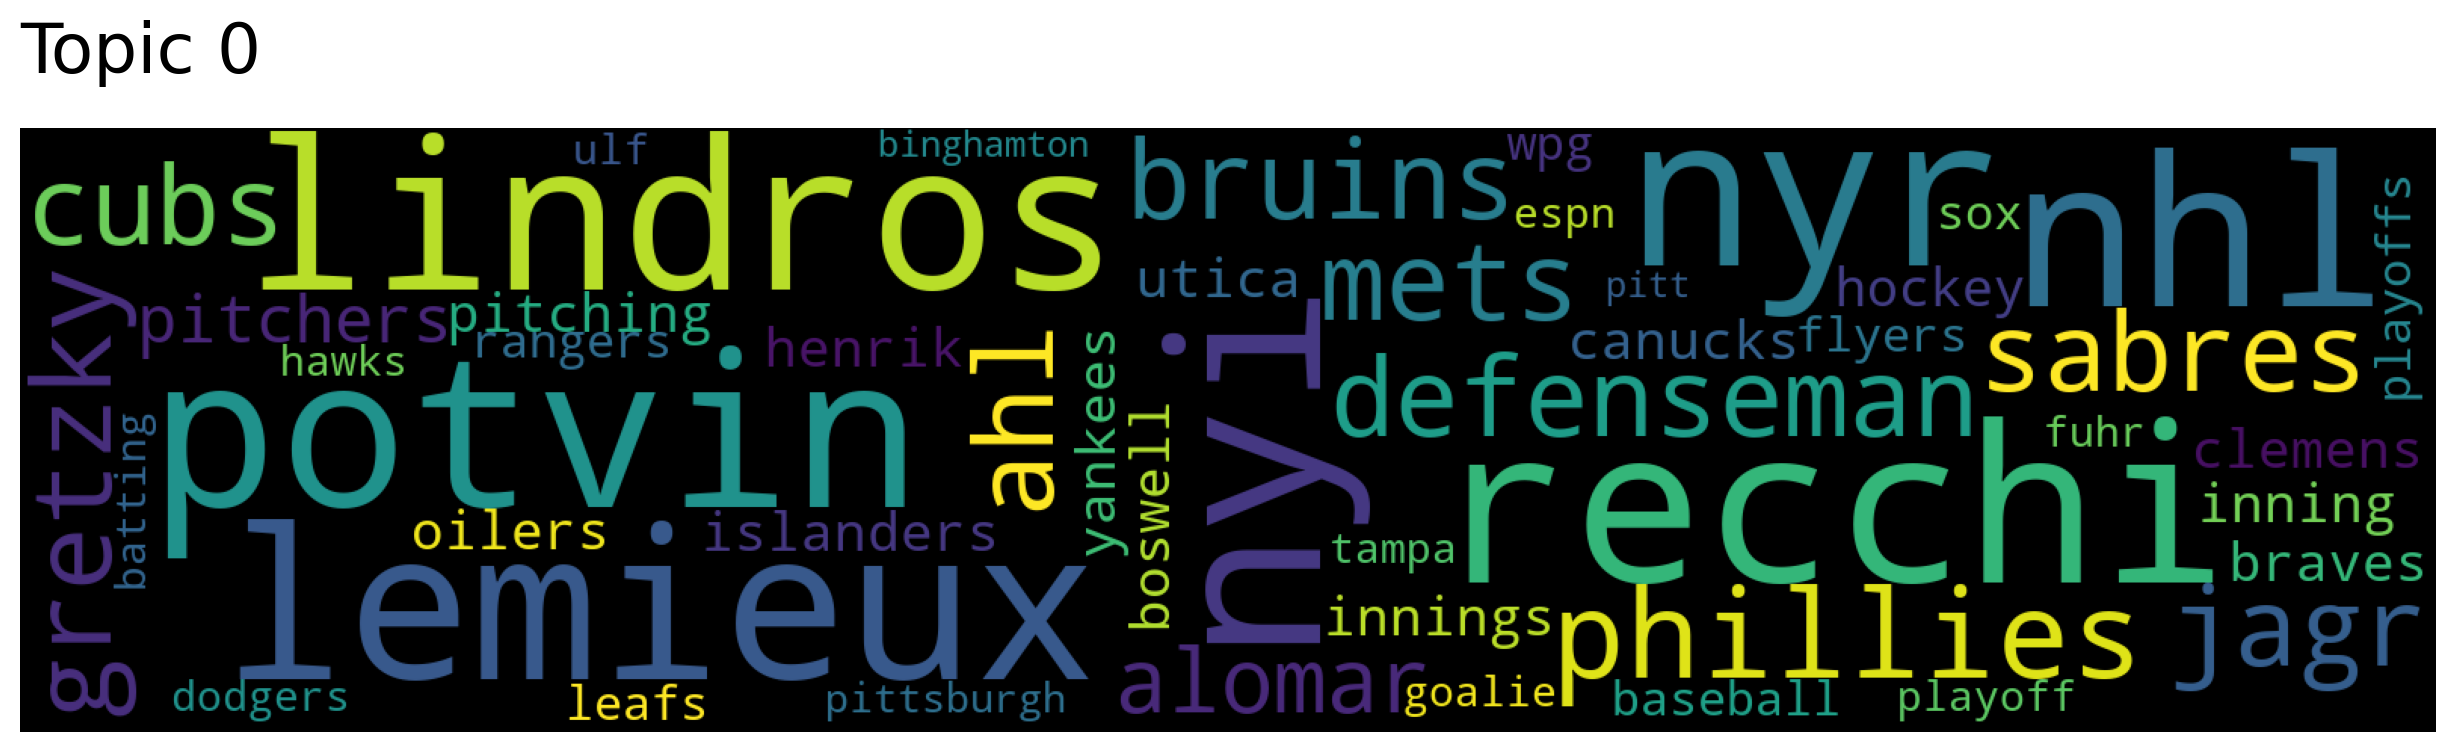

In [39]:
model.generate_topic_wordcloud(0)

## Accessing Topic Vectors

In [40]:
model.topic_vectors

array([[-0.0089221 , -0.08844204, -0.05214721, ...,  0.02013448,
        -0.12034253, -0.00016416],
       [-0.04073341, -0.02724234,  0.02232619, ...,  0.07289152,
        -0.06190496, -0.05333134],
       [-0.03109053, -0.04712857, -0.0286285 , ...,  0.04862078,
        -0.04576969, -0.03572928],
       ...,
       [ 0.04211874, -0.04386728, -0.01201803, ...,  0.04090209,
        -0.02195372,  0.04722503],
       [ 0.03106876, -0.02830448, -0.05370411, ...,  0.08351161,
        -0.06493302, -0.04720421],
       [-0.05054405,  0.05358684,  0.00382467, ...,  0.04024107,
        -0.0149809 , -0.05042798]], dtype=float32)

## Searching for Topics by Keyword

In [41]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["politics"], num_topics=3)

In [42]:
topic_words, topic_scores

([array(['clinton', 'bush', 'president', 'reagan', 'democratic',
         'republicans', 'congress', 'wiretap', 'elected', 'johnson',
         'election', 'administration', 'politically', 'politicians',
         'politics', 'bill', 'executive', 'corrupt', 'senate', 'political',
         'ford', 'rockefeller', 'nist', 'constitutional', 'lib',
         'democracy', 'iraq', 'liar', 'nuy', 'affairs', 'gov', 'barry',
         'koresh', 'nsa', 'libertarians', 'grant', 'weren', 'jefferson',
         'libertarian', 'feds', 'government', 'convention', 'bullshit',
         'secretary', 'ws', 'conservative', 'clemens', 'treaty', 'fool',
         'don'], dtype='<U15'),
  array(['um', 'ci', 'oo', 'll', 'ye', 'hmm', 'un', 'uh', 'y_', 'wt', 'on',
         'uu', 'actually', 'an', 'eh', 'way', 'er', 'des', 'se', 'not',
         'has', 'huh', 'of', 'ya', 'so', 'it', 'in', 'le', 'upon', 'hm',
         'one', 'is', 'es', 'ne', 'at', 'what', 'no', 'shut', 'est', 'au',
         'mm', 'got', 'dont', 'lo', 't

## Searching for Documents by Topic

In [44]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 12405, Score: 0.7508730888366699
-----------

I think this guy is going to be just a little bit disappointed.  Lemieux
two, Tocchet, Mullen, Tippett, and Jagr.  I buzzed my friend because I forgot
who had scored Mullen's goal.  I said, "Who scored?  Lemieux two, Tocchet,
Tippett, Jagr."  The funny part was I said the "Jagr" part non-chalantly as
he was in the process of scoring while I was asking this question!!! :-)

All in all ABC's coverage wasn't bad.  On a scale of 1-10, I give it about
an 8.  How were the games in the Chi/St. Louis/LA area???


That's stupid!!!  I'd complain to the television network!  If I were to even
see a Pirates game on instead of a Penguins game at this time of the year, I
and many other Pittsburghers would surely raise hell!!!


Texas is off to a good start, they may pull it out this year.  Whoops!  That
belongs in rec.sport.baseball!!!
-----------

Document: 2614, Score: 0.7313827276229858
-----------
1992-93 Los Angeles Kings notes.
-----------

## Reducing the Number of Topics

In [45]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

In [46]:
topic_mapping[1]

[11, 56, 65, 94, 59, 96, 32, 13]

In [48]:
model.topic_words_reduced[0]

array(['recchi', 'potvin', 'nyr', 'lemieux', 'nyi', 'lindros', 'nhl',
       'defenseman', 'phillies', 'mets', 'ahl', 'jagr', 'bruins', 'cubs',
       'sabres', 'gretzky', 'alomar', 'pitchers', 'pitching', 'clemens',
       'canucks', 'inning', 'henrik', 'innings', 'yankees', 'oilers',
       'boswell', 'islanders', 'utica', 'braves', 'hockey', 'rangers',
       'leafs', 'flyers', 'sox', 'baseball', 'wpg', 'playoffs', 'dodgers',
       'espn', 'goalie', 'fuhr', 'playoff', 'ulf', 'hawks', 'batting',
       'tampa', 'pittsburgh', 'binghamton', 'pitt'], dtype='<U15')